In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
import os
from surprise import Reader
import random

In [64]:
df=pd.read_csv('Electronic_dataset.csv')

In [3]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  500000
Columns  :  4

Features : 
 ['user_id', 'prod_id', 'ratings', 'timestamp']

Missing values :   0

Unique values :  
 user_id      448368
prod_id      130138
ratings           5
timestamp      5198
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
user_id      500000 non-null object
prod_id      500000 non-null object
ratings      500000 non-null float64
timestamp    500000 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.3+ MB


In [5]:
df.describe(include='all')

,user_id,prod_id,ratings,timestamp
count,500000,500000,500000.000000,5.000000e+05
unique,448368,130138,NaN,NaN
top,A680RUE1FDO8B,B0074BW614,NaN,NaN
freq,36,1138,NaN,NaN
mean,NaN,NaN,4.013172,1.338261e+09
std,NaN,NaN,1.379996,6.894639e+07
min,NaN,NaN,1.000000,9.314784e+08
25%,NaN,NaN,3.000000,1.315526e+09
50%,NaN,NaN,5.000000,1.361059e+09
75%,NaN,NaN,5.000000,1.386115e+09


In [6]:
df.head()

,user_id,prod_id,ratings,timestamp
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0,1364774400
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0,1357257600
2,A1SINU2I4IOPNU,B000GBO9IM,4.0,1358121600
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0,1404950400
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0,1294444800


In [66]:
users=pd.DataFrame(df.groupby('user_id')['ratings'].count())

In [86]:
for x in  users[users['ratings']>5].index:
    good_users=good_users.append(df[df['user_id']==x])
good_users.shape 

(10635, 4)

In [7]:
df.groupby('prod_id')['ratings'].mean().sort_values(ascending=False).head(10)

prod_id
BT008G3W52    5.0
B004AC52UC    5.0
B004AGJRMC    5.0
B004AGED3A    5.0
B004AFOK2U    5.0
B004AFISUK    5.0
B004AFFZNI    5.0
B004AFEYU8    5.0
B004AEVIOY    5.0
B004AEVI4Y    5.0
Name: ratings, dtype: float64

In [8]:
df.groupby('user_id')['ratings'].count().sort_values(ascending=False).head(10)

user_id
A680RUE1FDO8B     36
A3OXHLG6DIBRW8    34
ADLVFFE4VBT8      30
A5JLAU2ARJ0BO     29
A2NOW4U7W3F7RI    28
A231WM2Z2JL0U3    24
A2AY4YUOX2N1BQ    23
A6FIAB28IS79      23
A4WEZJOIZIV4U     22
A1ODOGXEYECQQ8    21
Name: ratings, dtype: int64

In [9]:
df['ratings'].value_counts()

5.0    277826
4.0     95089
1.0     57452
3.0     40382
2.0     29251
Name: ratings, dtype: int64

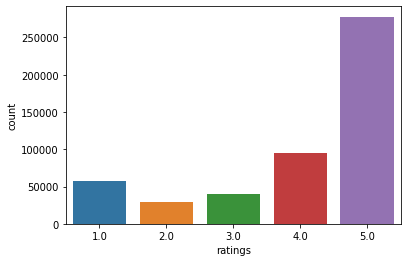

In [10]:
sns.countplot(df['ratings'])

In [11]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.user_id)))
print("Total No of products  :", len(np.unique(df.prod_id)))

Total data 
--------------------------------------------------

Total no of ratings : 500000
Total No of Users   : 448368
Total No of products  : 130138


In [12]:
user_mean_ratings=pd.DataFrame(df.groupby('user_id')['ratings'].mean())

In [13]:
user_mean_ratings

,ratings
user_id,
A000186437REL8X2RW8UW,4.0
A00094601Z09BC1N3Q4L7,1.0
A0009878M2RGMMHGJH39,5.0
A0010326246DL36LSV742,5.0
A0015188MMYTOC3V4U11,4.0
...,...
AZZX23UGJGKTT,4.5
AZZX3COL525E6,4.0
AZZY9LPX8V5LS,5.0


In [14]:
product_mean_ratings=pd.DataFrame(df.groupby('prod_id')['ratings'].mean())

In [15]:
product_mean_ratings[product_mean_ratings['ratings']>3]

,ratings
prod_id,
0528881469,5.0
0594012015,5.0
0594033926,5.0
0594451647,5.0
0594481813,5.0
...,...
B00LJO86NE,5.0
B00LKWZKH0,4.0
B00LMOH8DU,5.0


In [16]:
#Analysis of rating given by the user 

no_of_rated_products = pd.DataFrame(df.groupby(by='prod_id')['ratings'].count().sort_values(ascending=False))

no_of_rated_products.head()

,ratings
prod_id,
B0074BW614,1138
B00DR0PDNE,1094
B007WTAJTO,883
B0019EHU8G,774
B006GWO5WK,770


In [17]:
products_ratings_counts=no_of_rated_products.merge(product_mean_ratings,on='prod_id')

products_ratings_counts=products_ratings_counts.rename(columns={"ratings_x": "ratings_count", "ratings_y": "mean_rating"}, errors="raise")
products_ratings_counts


,ratings_count,mean_rating
prod_id,,
B0074BW614,1138,4.465729
B00DR0PDNE,1094,3.943327
B007WTAJTO,883,4.417894
B0019EHU8G,774,4.740310
B006GWO5WK,770,4.275325
...,...,...
B00529U4XW,1,4.000000
B0052ACAIS,1,4.000000
B0052AIGUY,1,5.000000


In [18]:
products_ratings_counts[products_ratings_counts['mean_rating']>4.5].head(20)

,ratings_count,mean_rating
prod_id,,
B0019EHU8G,774,4.740310
B003ES5ZUU,681,4.684288
B007R5YDYA,659,4.738998
B003LR7ME6,562,4.546263
B000LRMS66,534,4.745318
B002WE6D44,454,4.502203
B00316263Y,315,4.761905
B002V88HFE,287,4.634146
B007IV7KRU,272,4.602941


In [38]:
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['user_id', 'prod_id', 'ratings']], reader)
trainset, testset = train_test_split(data, test_size=.15)

In [40]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...


MemoryError: 

In [98]:
# df=pd.read_csv('Electronic_dataset.csv')
# df=df.sample(frac=.01)
# df=df.drop(columns='timestamp')
df=good_users
reader = Reader(rating_scale=(1, 5))
print(df.shape)
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['user_id', 'prod_id', 'ratings']], reader)

trainset, testset = train_test_split(data, test_size=.15)
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

(10635, 4)
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [99]:
test_pred = algo.test(testset)

In [96]:
test_pred

[Prediction(uid='A680RUE1FDO8B', iid='B000TMI0VU', r_ui=4.0, est=4.0, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='A2ALRZ0ENQLYY5', iid='B002MU1ZRS', r_ui=4.0, est=4.284212855404359, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1RPTVW5VEOSI', iid='B0043VE28I', r_ui=4.0, est=4.284212855404359, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2WW57XX2UVLM6', iid='B000FCF32I', r_ui=4.0, est=4.284212855404359, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2H23FQ7QR9DYV', iid='B002Q0W80C', r_ui=4.0, est=4.284212855404359, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A25PKF8V3Q4IOL', iid='B007BY3PBE', r_ui=5.0, est=4.284212855404359, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A11KZ906QD08C5', iid='B0057CL3D4', r_ui=5.0, est=5, detail

In [100]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 0.6899


0.6899093383320017